In [3]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing matplotlib's pyplot for data visualization
import matplotlib.pyplot as plt

# Importing numpy for numerical operations
import numpy as np

# Importing functions to plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing seasonal decomposition method (classical decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [9]:
# Reading the 'AirPassengers.csv' file into a pandas DataFrame
data = pd.read_csv("AirPassengers.csv")

# Displaying the first 5 rows of the DataFrame to get an overview of the data
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Check data types of all columns to confirm conversion
data.dtypes

,0
Month,datetime64[ns]
Passengers,int64


In [11]:
# Set the 'Month' column as the index of the DataFrame
data.set_index('Month', inplace=True)

#Show Last Dataset
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
data.count()

,0
Passengers,144


<ipython-input-15-6227fa3c874a>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


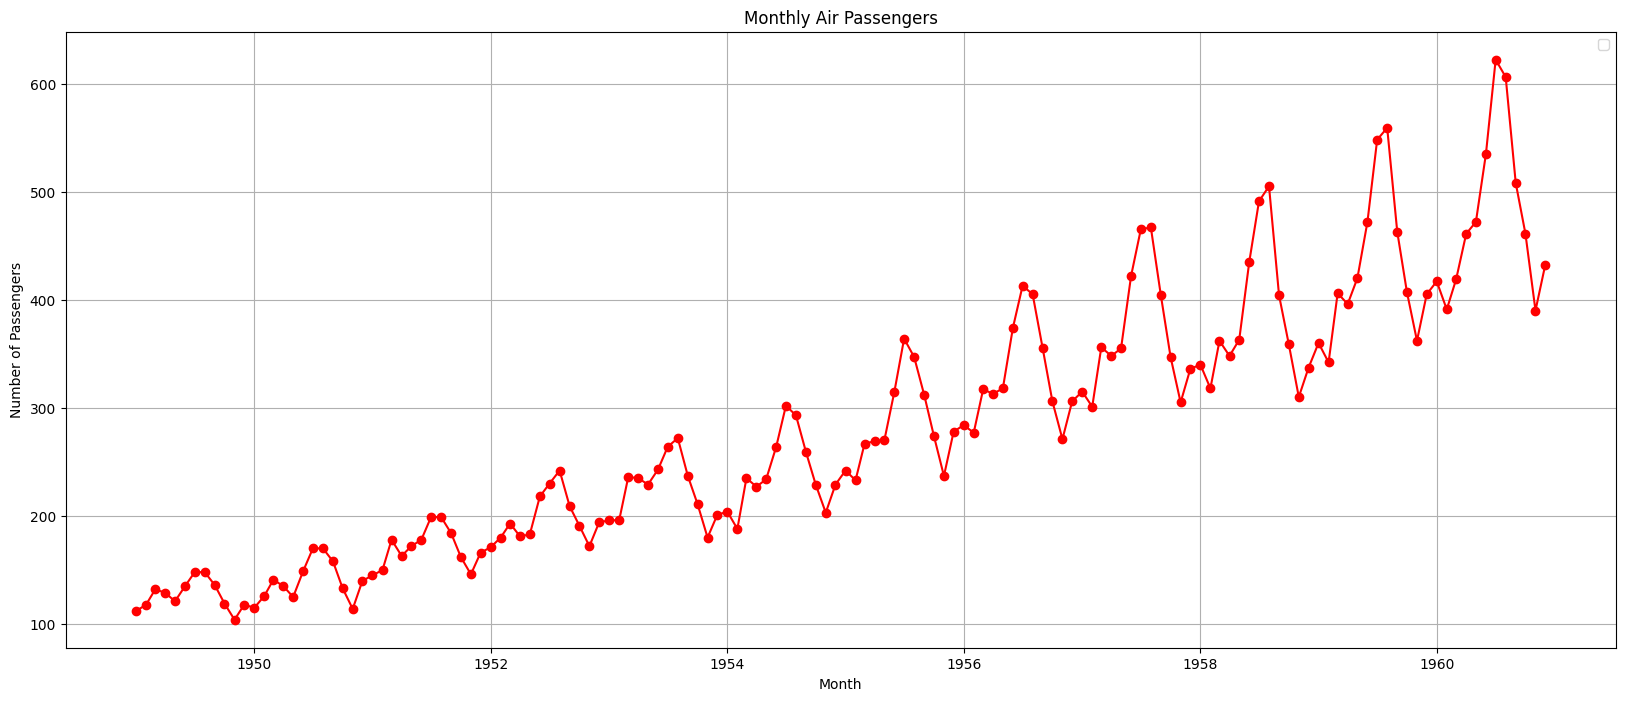

In [15]:
# Set the figure size to 20x8 inches for a wide and clear plot
plt.figure(figsize=(20, 8))

# Plot the number of passengers over time
# 'marker' adds circular points, 'linestyle' is solid, and 'color' is red
plt.plot(data.Passengers, marker='o', linestyle='-', color='r')

# Set the title of the plot
plt.title('Monthly Air Passengers')

# Label the x-axis as 'Year'
plt.xlabel('Month')

# Label the y-axis as 'Number of Passengers'
plt.ylabel('Number of Passengers')

# Display a legend (even though no label is set here, it's prepared for future use)
plt.legend()

# Show grid lines to make the chart easier to read
plt.grid(True)

# Display the plot
plt.show()

<h1> Autocorrelation (ACF) </h1>

<Figure size 2000x900 with 0 Axes>

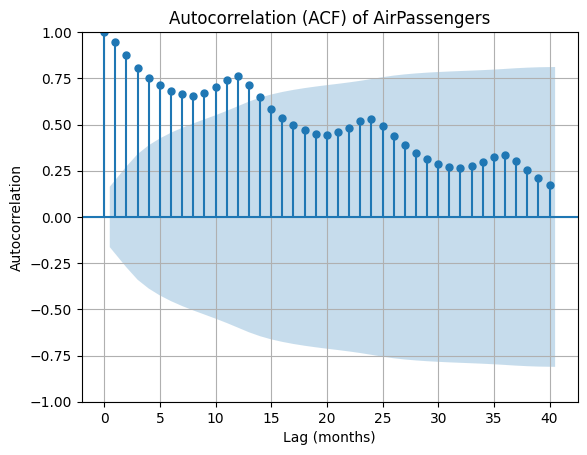

In [22]:
# Extract the passenger column
passengers = data['Passengers']

# Plot the autocorrelation
plt.figure(figsize=(20, 9))
plot_acf(passengers, lags=40)  # Try up to 40 lags (months)
plt.title("Autocorrelation (ACF) of AirPassengers")
plt.xlabel("Lag (months)")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

<h2> Interpretation of the Autocorrelation (ACF) Plot of AirPassengers </h2>

The ACF plot shows the autocorrelation of the **AirPassengers** time series dataset, which contains monthly airline passenger counts from 1949 to 1960.

</br>

**Key points:**

✅ **X-axis (Lag in months)**: Number of months back we are looking when measuring correlation.

✅ **Y-axis (Autocorrelation)**: Strength of the correlation between the time series and its lagged version. Values near 1 = strong positive correlation; near -1 = strong negative correlation.

✅ **Blue spikes**: Autocorrelation value at each lag.

✅ **Shaded area**: 95% confidence interval. Spikes outside this band are statistically significant.

</br>

---

</br>

**Interpretation:**

- There is **strong positive autocorrelation** at short lags (1–12), meaning high values tend to be followed by high values.

- The **seasonality pattern** is clear around lag 12, 24, 36 — indicating a yearly seasonal cycle.

- The **slow decay** of autocorrelation suggests the series is **non-stationary** (its mean and variance change over time).

- Autocorrelation remains significant up to about lag 35–40, showing **long memory** in the data.

</br>

---

</br>

**Summary:**
- Strong short-term autocorrelation
- Clear annual seasonality
- Non-stationary behavior
- Likely needs differencing or seasonal differencing before applying ARIMA-type models



<h1> Partial Autocorrelation (PACF) </h1>

<Figure size 2000x900 with 0 Axes>

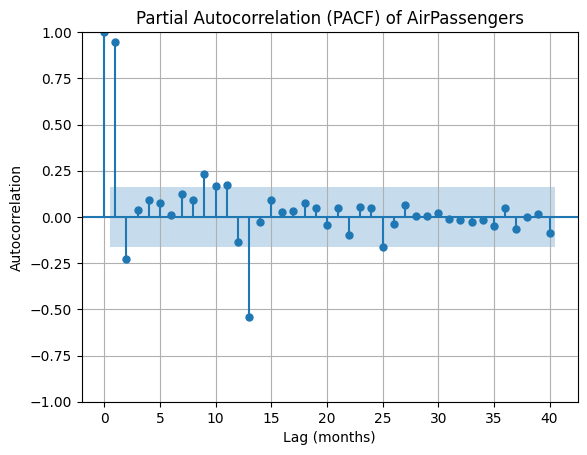

In [20]:
# Plot the autocorrelation
plt.figure(figsize=(20, 9))
plot_pacf(passengers, lags=40)  # Try up to 40 lags (months)
plt.title("Partial Autocorrelation (PACF) of AirPassengers")
plt.xlabel("Lag (months)")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

<h2> Interpretation of the Partial Autocorrelation (PACF) Plot of AirPassengers </h2>

The PACF plot shows the **partial autocorrelation** of the AirPassengers time series, which contains monthly airline passenger counts from 1949 to 1960.

</br>

**Key points:**

✅ **X-axis (Lag in months)**: Number of months back when measuring partial correlation.

✅ **Y-axis (Autocorrelation)**: Strength of the partial correlation between the series and its lagged values, after removing the effects of intermediate lags.

✅ **Blue spikes**: Partial autocorrelation at each lag.

✅ **Shaded area**: 95% confidence interval. Spikes outside this band are statistically significant.

</br>

---

</br>

**Interpretation:**

- There is a **very strong partial autocorrelation at lag 1**, suggesting a significant immediate relationship.

- There is **minor significance at lags around 2–3 and 12**, hinting at some seasonal pattern (12-month cycle).

- After lag 1, most partial autocorrelations drop quickly and remain within the confidence band, indicating that once lag 1 is accounted for, the additional lags have little explanatory power.

- The sharp cutoff after lag 1 suggests that the series can be modeled with an **AR(1)** component (first-order autoregression) if differenced appropriately.

</br>

---

</br>

**Summary:**
- Strong lag 1 partial autocorrelation.
- Minor seasonal signals around lag 12.
- Rapid drop-off → suggests using a low-order AR model.
- Combined with the ACF, indicates the need for **differencing + seasonal ARIMA (SARIMA)** modeling.

